In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-dataset/raw_merged_heart_dataset.csv
/kaggle/input/heart-dataset/cleaned_merged_heart_dataset.csv


In [2]:
df= pd.read_csv('/kaggle/input/heart-dataset/cleaned_merged_heart_dataset.csv')

df.shape

(1888, 14)

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [5]:
len(df[df.duplicated()])

1286

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(602, 14)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df = df.rename(columns={
    'trestbps': 'bps',
    'thalachh': 'mhr'
})

df.columns

Index(['age', 'sex', 'cp', 'bps', 'chol', 'fbs', 'restecg', 'mhr', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
scaler = StandardScaler()
numerical_cols = ['age', 'bps', 'chol', 'mhr']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:")
print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        62
           1       0.83      0.76      0.80        59

    accuracy                           0.81       121
   macro avg       0.81      0.81      0.81       121
weighted avg       0.81      0.81      0.81       121


Accuracy:
80.99%


In [14]:
# Risk stratification

risk_groups = []
for prob in y_prob:
    if prob < 0.3:
        risk_groups.append('Low')
    elif prob < 0.7:
        risk_groups.append('Medium')
    else:
        risk_groups.append('High')

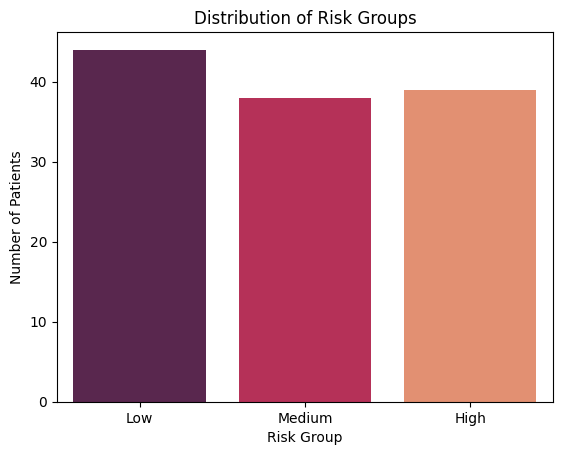

In [15]:
# Plot risk distribution

sn.countplot(x=risk_groups, order=['Low', 'Medium', 'High'], palette='rocket')
plt.title('Distribution of Risk Groups')
plt.xlabel('Risk Group')
plt.ylabel('Number of Patients')
plt.show()

In [16]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
    Feature  Importance
12     thal    0.176930
7       mhr    0.105801
2        cp    0.102978
10    slope    0.097817
0       age    0.093764
4      chol    0.091328
3       bps    0.084236
9   oldpeak    0.082726
11       ca    0.062386
6   restecg    0.039221
1       sex    0.025081
8     exang    0.024150
5       fbs    0.013582


In [17]:
# Add risk groups to test data for analysis 
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_pred
test_results['Probability'] = y_prob
test_results['Risk_Group'] = risk_groups

test_results.head(10)

,age,sex,cp,bps,chol,fbs,restecg,mhr,exang,oldpeak,slope,ca,thal,Actual,Predicted,Probability,Risk_Group
223,0.131583,0,0,3.804138,0.763113,1,0,-0.668744,1,4.0,0,2,3,0,0,0.07,Low
1568,-0.313348,1,2,-0.690833,1.473942,0,0,0.987576,0,0.2,1,0,3,0,0,0.20,Low
1489,-1.870605,1,1,-0.690833,-0.331950,0,0,1.412274,1,3.8,2,0,7,1,0,0.45,Medium
1531,0.576514,1,4,-0.409897,0.186764,0,2,-0.328986,1,2.8,2,1,7,1,1,0.98,High
1580,-1.203209,1,2,-0.128962,-0.562489,0,2,1.667092,0,0.0,1,0,3,0,0,0.09,Low
1567,-0.869511,1,3,0.320535,0.167552,0,2,0.308060,0,0.0,1,0,3,0,0,0.19,Low
1350,-0.758278,1,2,-0.128962,-0.062987,0,2,1.327334,0,0.2,2,0,3,0,0,0.20,Low
295,0.910212,1,0,0.432910,-1.177261,0,0,-0.201577,1,4.0,2,2,3,0,0,0.18,Low
160,0.131583,1,1,-0.690833,-0.159045,0,1,0.860167,0,0.0,0,0,2,1,1,0.68,Medium
219,-0.758278,1,0,-0.128962,0.148341,1,0,0.053242,1,0.0,2,2,3,0,0,0.35,Medium
